## Noise cloud ##


**Goal:** Procedurally compute interesting background images


"Noise cloud" combines random color choices with perturbed pixels


[Demo](http://localhost:8888/home/alinen/files/webGL/glitch/experiments/experiments.html)

## How's it made? ##

* Approach: direct pixel manipulation


* Select colors randomly from pre-defined colormaps


* Stripes sets rows of the canvas buffer to the same value


* The sub operation perturbs each pixel by replacing it from a random vertical neighbor within range [-distance, distance]


* Smoothing replaces each pixel with an average of its neighbors



## Stripes ##

* Each row (or column) has the same color value, randomly chosen from our colormap

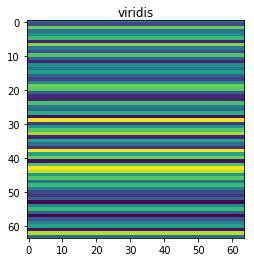

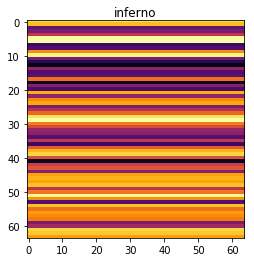

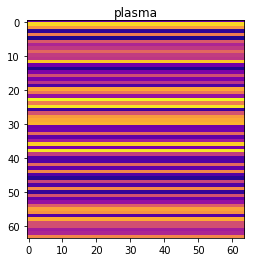

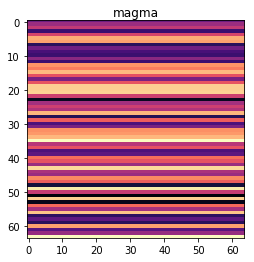

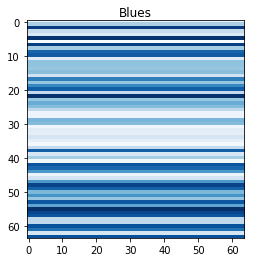

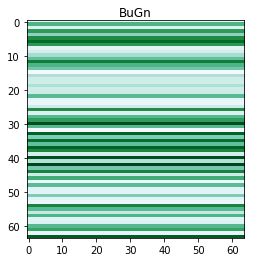

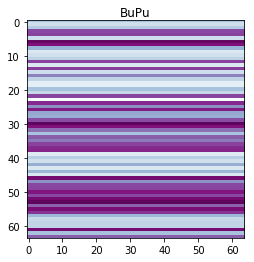

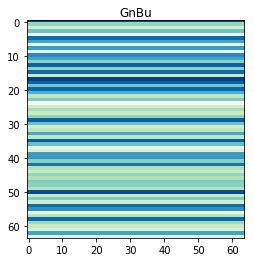

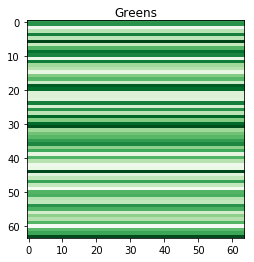

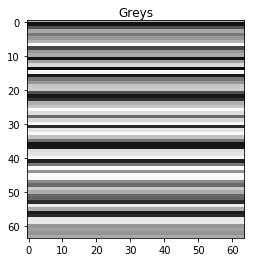

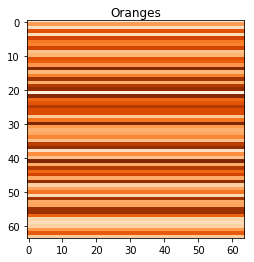

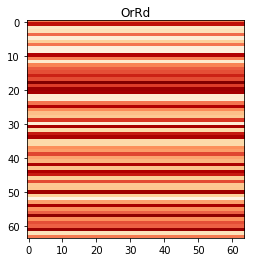

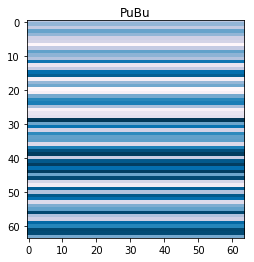

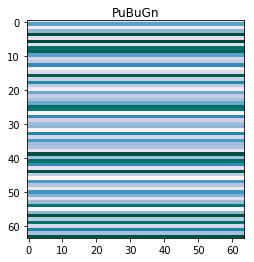

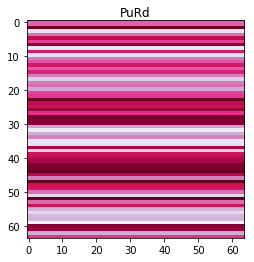

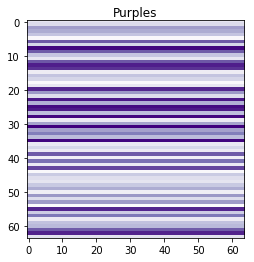

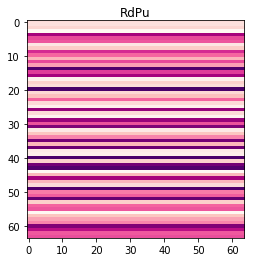

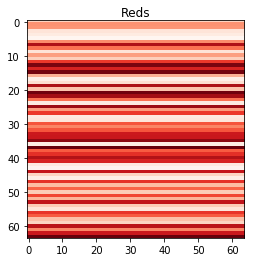

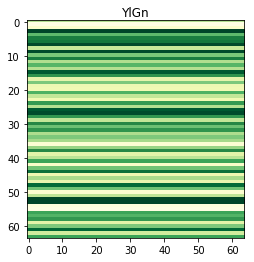

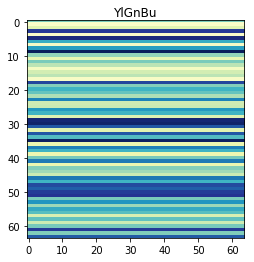

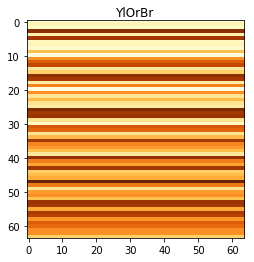

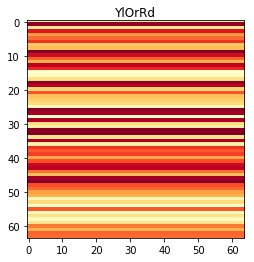

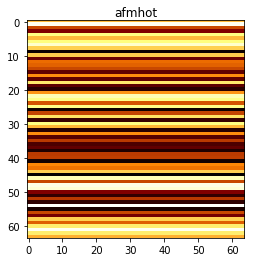

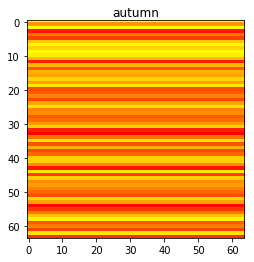

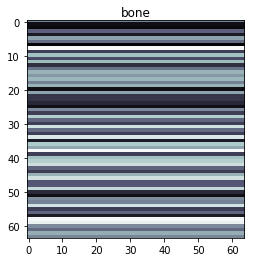

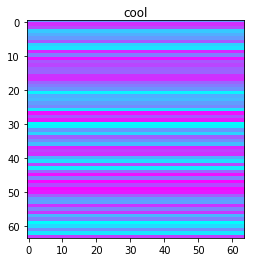

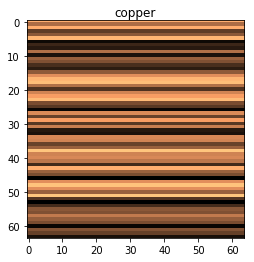

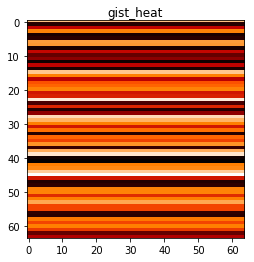

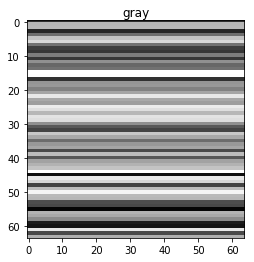

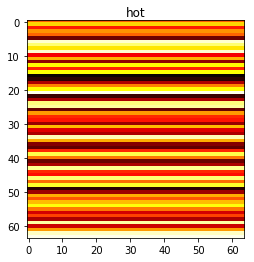

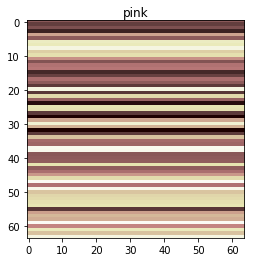

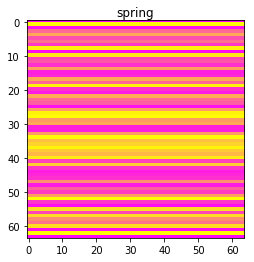

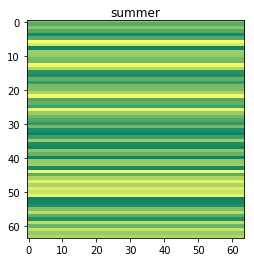

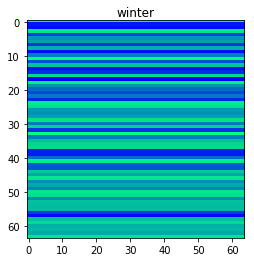

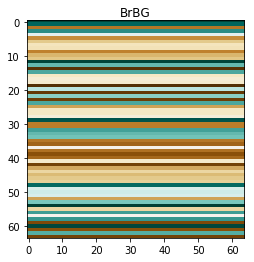

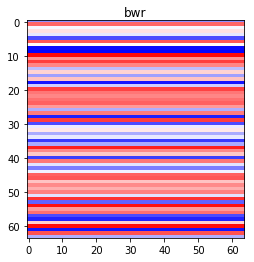

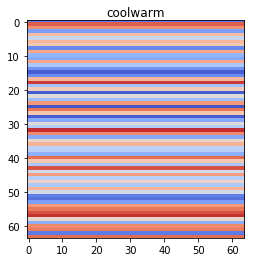

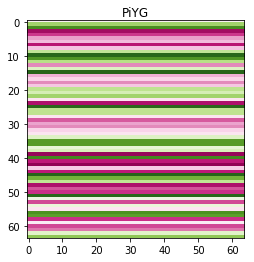

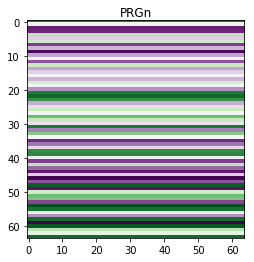

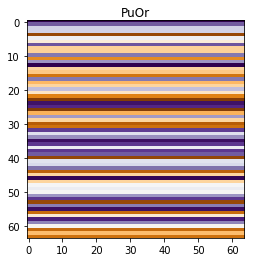

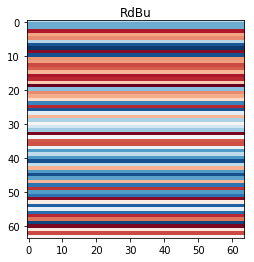

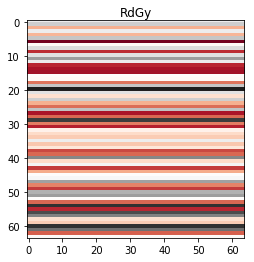

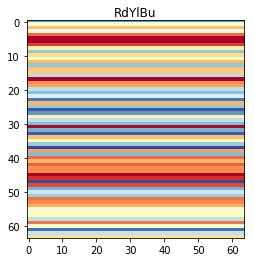

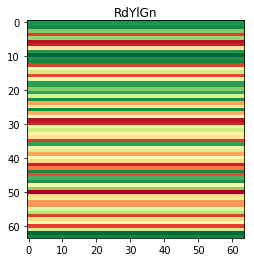

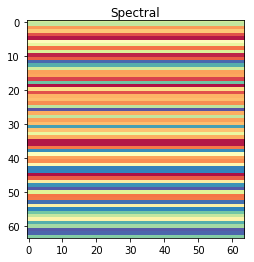

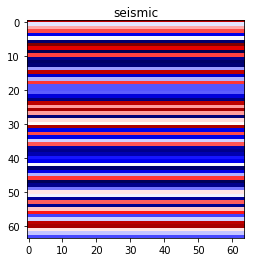

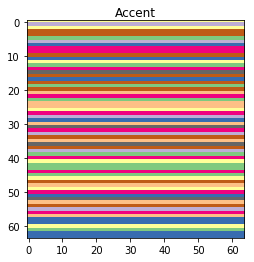

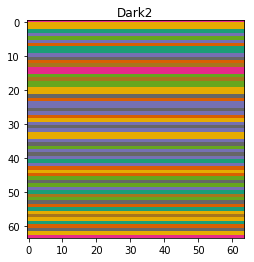

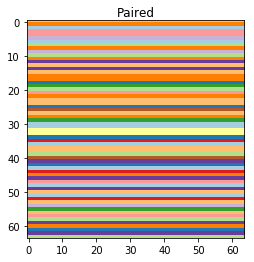

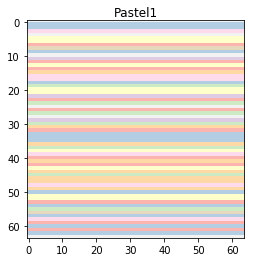

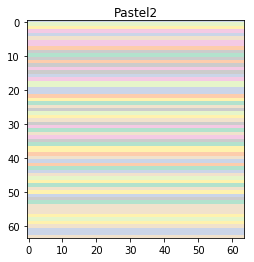

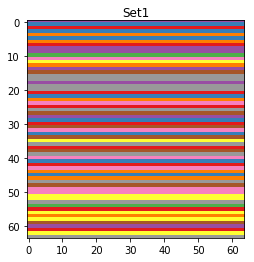

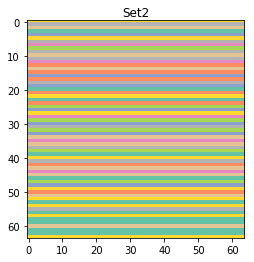

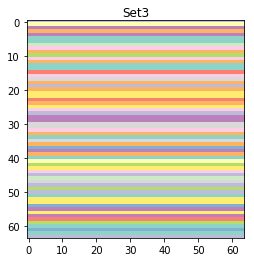

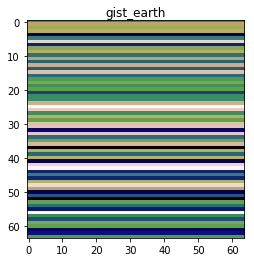

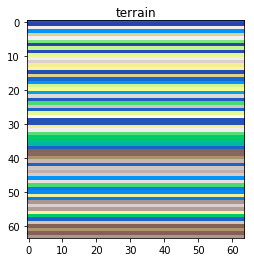

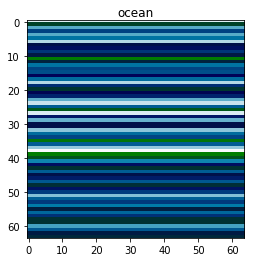

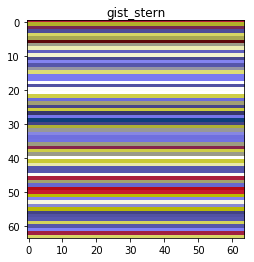

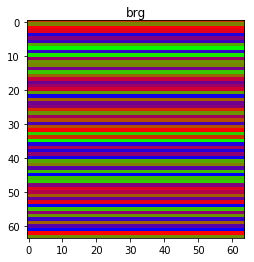

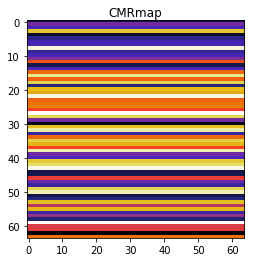

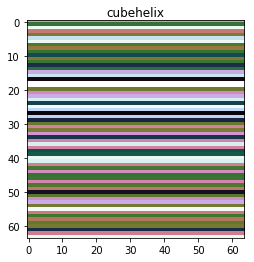

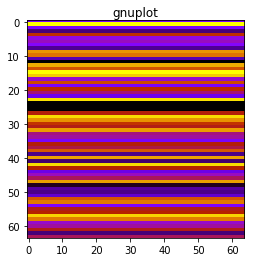

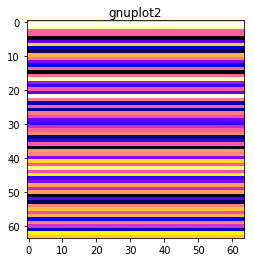

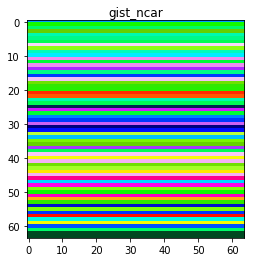

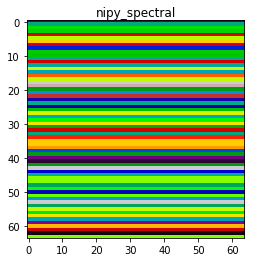

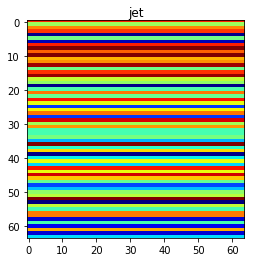

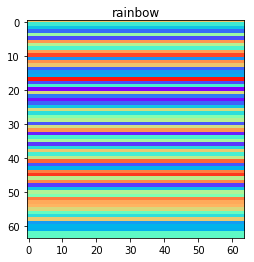

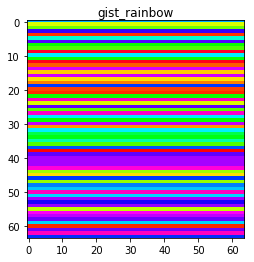

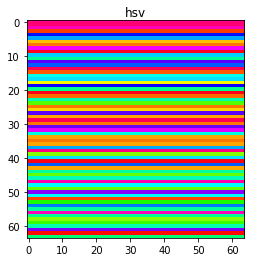

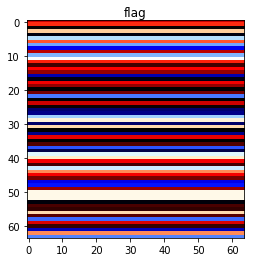

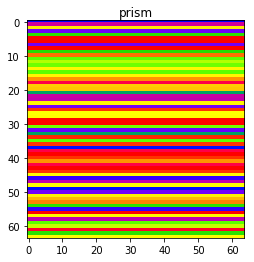

In [31]:
def random_stripes(img, name, stride):
    cmap = matplotlib.colors.makeMappingArray(100, plt.get_cmap(name), gamma=1.0)
    color = 0
    for i in range(height):      
        if i % stride == 0:
            intensity = np.random.random_sample(1)
            idx = (int) (intensity * 100)
            color = cmap[idx]
            
        for j in range(width):
            img[i][j][0] = cmap[idx][0]
            img[i][j][1] = cmap[idx][1]
            img[i][j][2] = cmap[idx][2]
        
    return img
    
for name in cmaps:
    img = random_stripes(img, name, 1)
    plt.figure()
    plt.imshow(img)
    plt.title(name)

## Test: Random gradients ##


* Gradients smoothly blend between two randomly chosen colors


* gradient_color = t * color1 + (1 - t) * color2, where t is in range  [0,1]

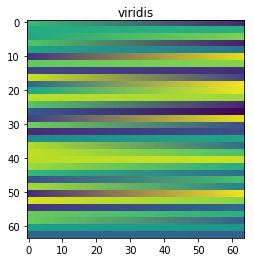

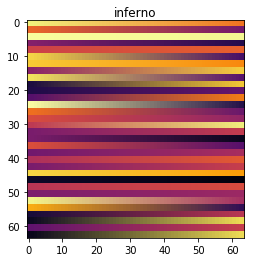

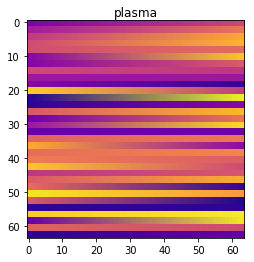

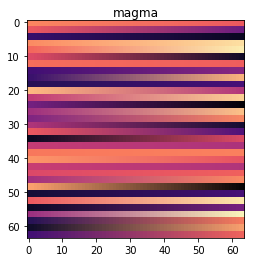

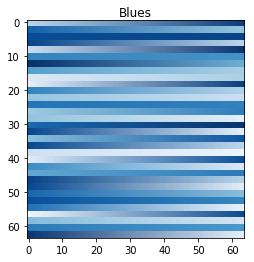

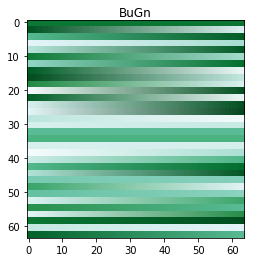

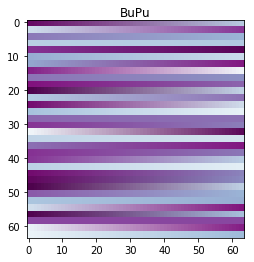

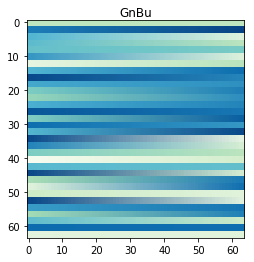

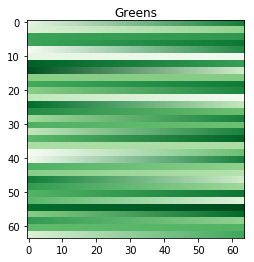

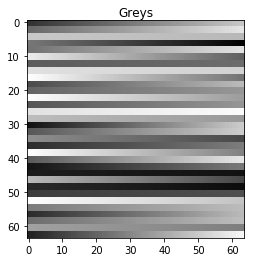

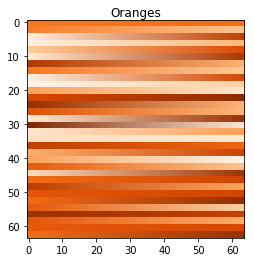

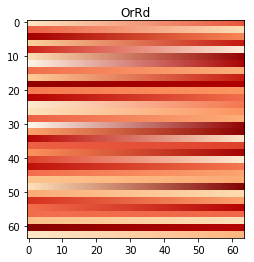

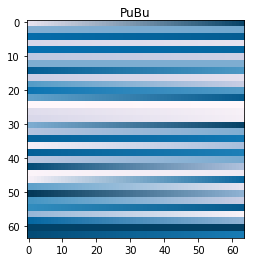

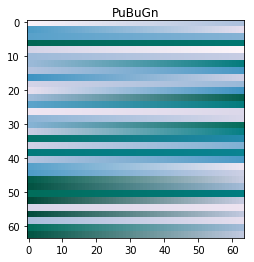

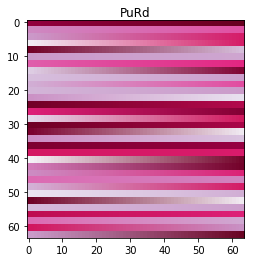

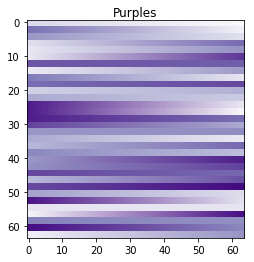

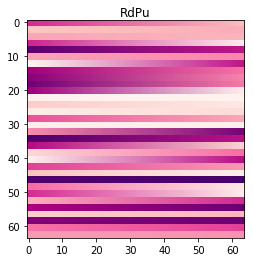

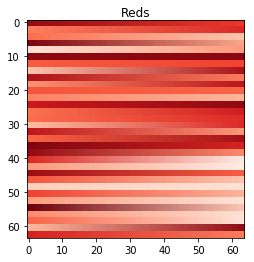

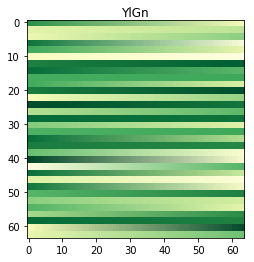

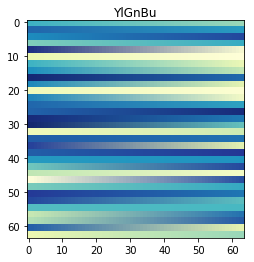

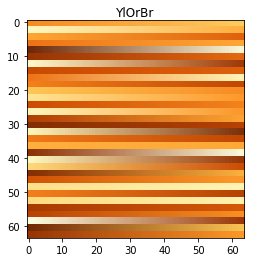

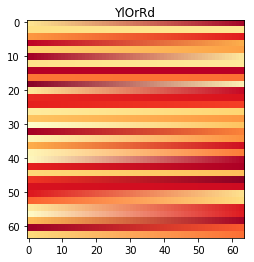

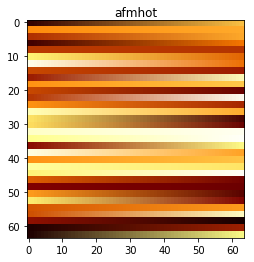

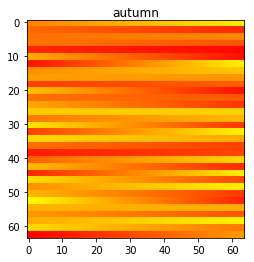

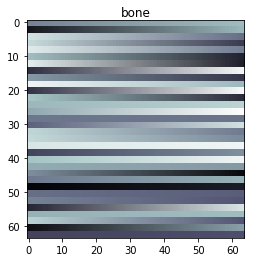

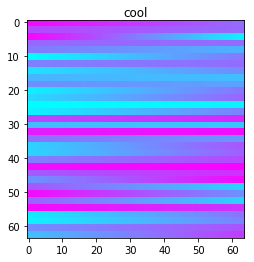

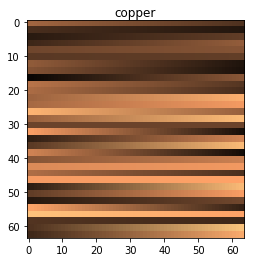

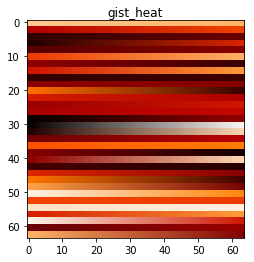

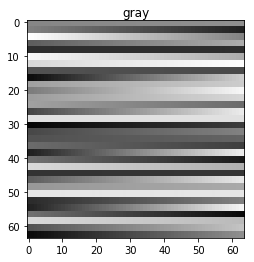

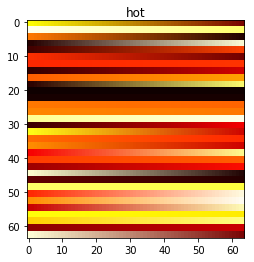

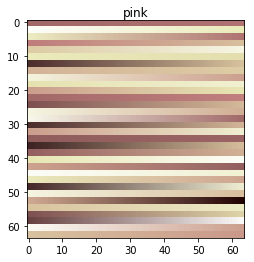

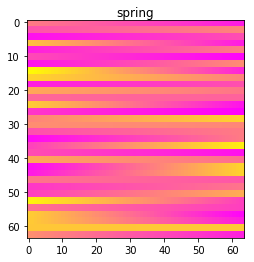

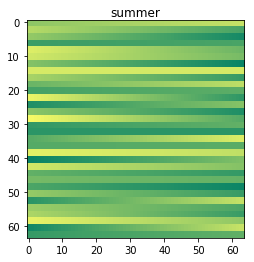

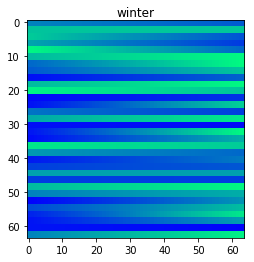

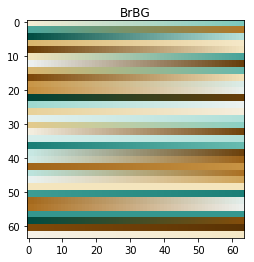

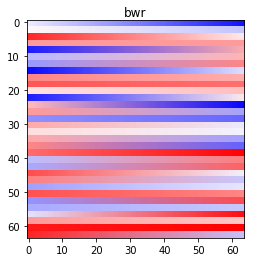

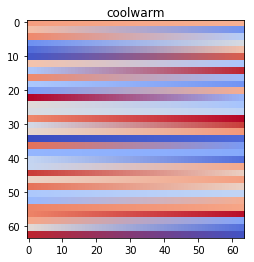

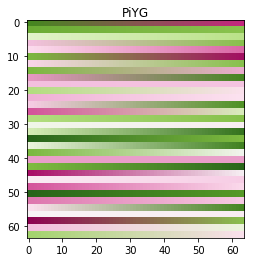

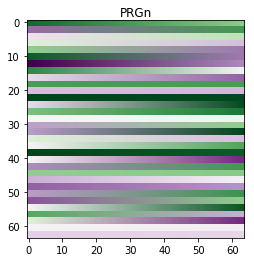

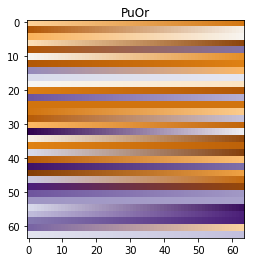

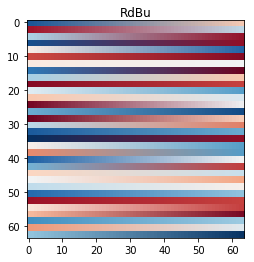

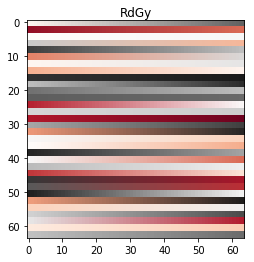

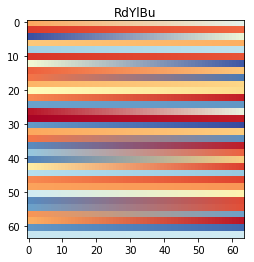

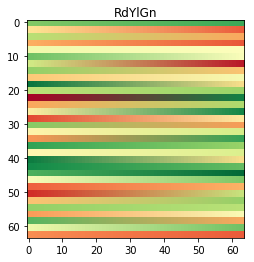

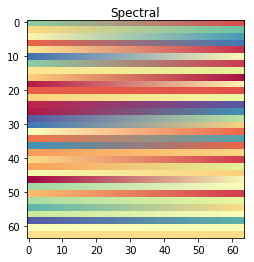

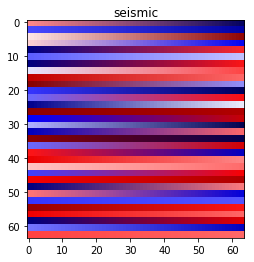

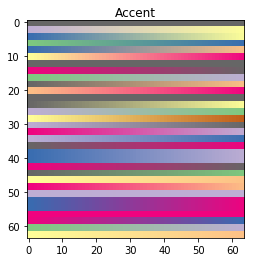

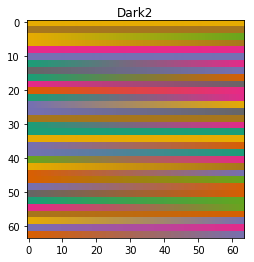

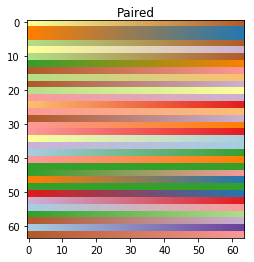

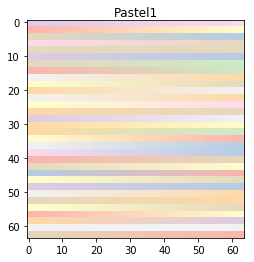

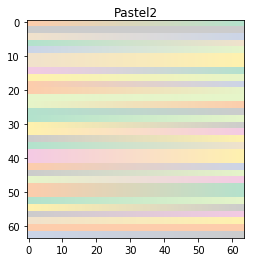

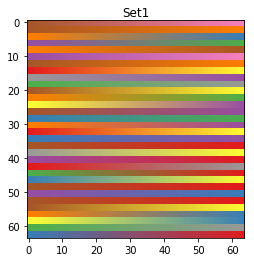

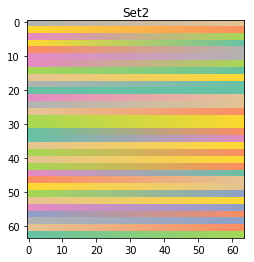

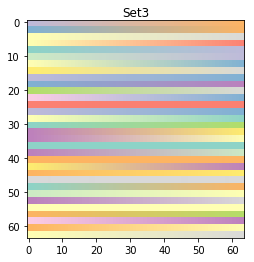

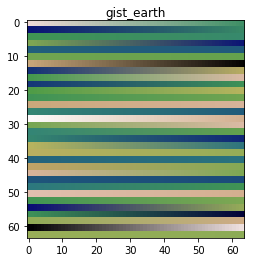

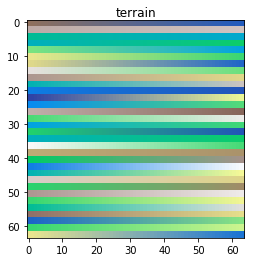

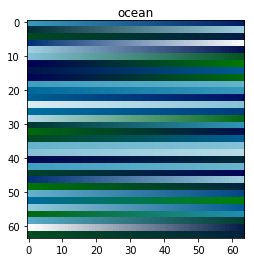

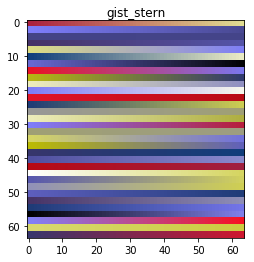

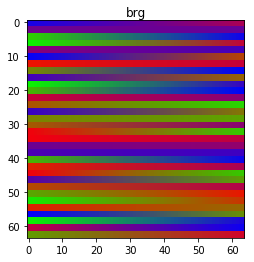

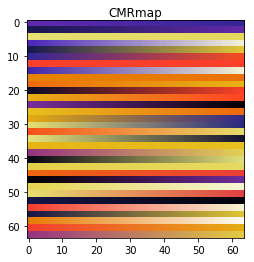

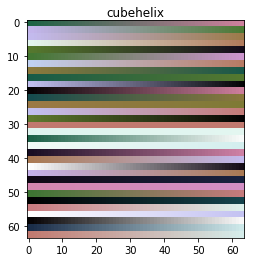

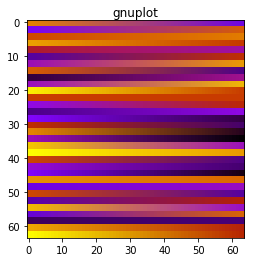

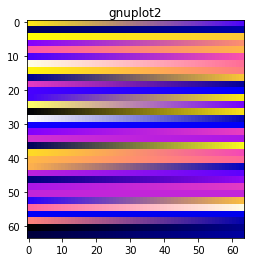

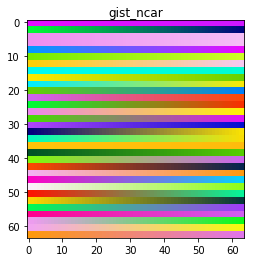

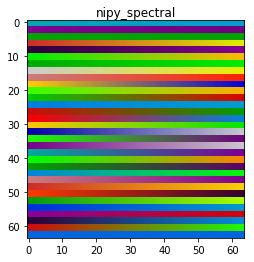

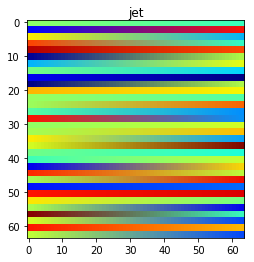

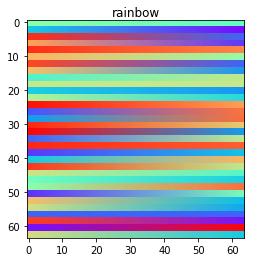

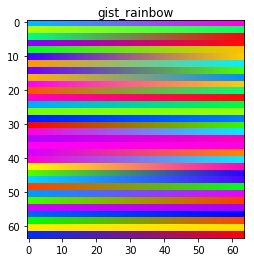

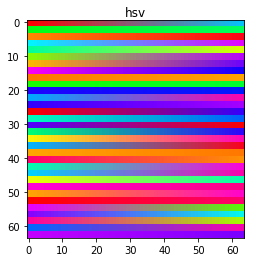

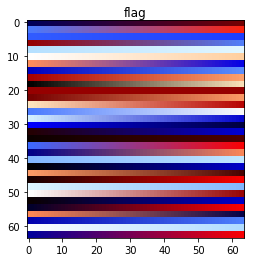

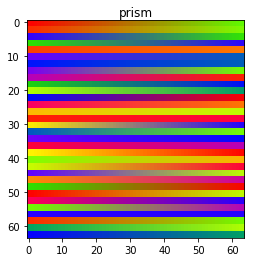

In [32]:
def random_gradients(img, name, stride):
    cmap = matplotlib.colors.makeMappingArray(100, plt.get_cmap(name), gamma=1.0)
    color1 = 0
    color2 = 0
    for i in range(height):      
        if i % stride == 0:
            intensity1, intensity2 = np.random.random_sample(2)
            
            idx1 = (int) (intensity1 * 100)
            color1 = cmap[idx1]

            idx2 = (int) (intensity2 * 100)
            color2 = cmap[idx2]
            
        for j in range(width):
            t = j/float(width)
            img[i][j][0] = t * cmap[idx1][0] + (1-t) * cmap[idx2][0]
            img[i][j][1] = t * cmap[idx1][1] + (1-t) * cmap[idx2][1]
            img[i][j][2] = t * cmap[idx1][2] + (1-t) * cmap[idx2][2]
        
    return img

for name in cmaps:
    img = random_gradients(img, name, 2)
    plt.figure()
    plt.imshow(img)
    plt.title(name)

## Sub pertubations ##


* Each pixel color is chosen from a random vertical neighbor within range [-distance, distance]


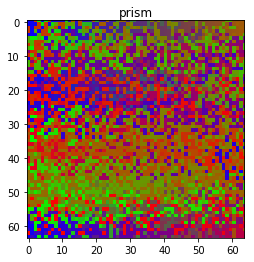

In [45]:
import random

def sub_vertical(img, distance):
    img2 = np.array(img)
    for i in range(height):                  
        for j in range(width):
            backpixel = min(height-1, max(0, i+random.randint(-distance,distance)))
            img2[i][j][0] = img[backpixel][j][0]
            img2[i][j][1] = img[backpixel][j][1]
            img2[i][j][2] = img[backpixel][j][2]
        
    return img2

img = random_gradients(img, "brg", 2)
img2 = sub_vertical(img, 5)
plt.figure()
plt.imshow(img2)
plt.title(name)

## Box blur smoothing ##

* Smoothing replaces each pixel with an average of its neighbors


* Below we use a box filter to smooth, each pixel is weighted evenly
```
pixel = 1/numPixels * (sum(neighbor_pixels))
```

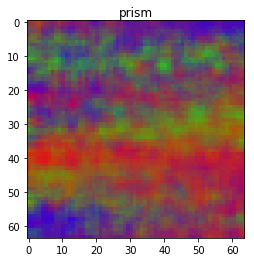

In [61]:
def smoothBox(img, neighborhood): # box blur
    img2 = np.array(img)
    for i in range(height):                  
        for j in range(width):
            aveR = img[i][j][0]
            aveG = img[i][j][1]
            aveB = img[i][j][2]
            count = 0.0
            for ii in range(i-neighborhood, i+neighborhood):
                ki = min(height-1, max(0, ii))
                for jj in range(j-neighborhood, j+neighborhood):
                    kj = min(width-1, max(0, jj))
                    aveR += img[ki][kj][0]
                    aveG += img[ki][kj][1]
                    aveB += img[ki][kj][2]
                    count += 1.0
                    
            img2[i][j][0] = aveR/count
            img2[i][j][1] = aveG/count
            img2[i][j][2] = aveB/count
    return img2

img = random_gradients(img, "brg", 2)
img2 = sub_vertical(img, 5)
img3 = smoothBox(img2, 2)
plt.figure()
plt.imshow(img3)
plt.title(name)

## Animating generated images ##

* Blend between subsequent generated images


* Blending is computed by combining the pixels of two images, t in [0,1]
```
image_blend = t * image1 + (1 - t) * image 2
```



<tr>
    <td> <img src="./examples/canvas2.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./examples/canvas3.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./examples/canvas4.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="./examples/canvas5.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> = </td>
    <td> <img src="./examples/StaticEffect.gif" alt="Drawing" style="width: 250px;"/> </td>
</tr>
<tr>
    <td> 1 </td>
    <td> 2</td>
    <td> 3 </td>
    <td> 4 </td>
    <td> </td>
    <td> Animated </td>
</tr>

